# Normalización de un vector

Dado un arreglo:
$$
v \in R^{n}
$$
Cuyos elementos cumplen:
$$
v_{i} \in [-10,10]
$$
Se le pide normalizar el arreglo considerando que $\mu$ es la media aritmética de los elementos de $v$ y $\sigma$ es la desviación estándar de los elementos de $v$.

Los elementos del arreglo de salida deben tener esa forma:
$$
o_{i} = (v_{i} - \mu) / \sigma
$$
Luego de normalizar todos los elementos del vector se debe cumplir que $\mu_{o}$ es $0$ y $\sigma_{o}$ es $1$.

Consideraciones para su solución:

- Tome en cuenta la precisión, pero sin priorizarla sobre la rapidez.
- Deberá trabajar con arreglos `numpy`.
- Su función en *Python* que normalizará el arreglo de entrada no puede emplear funciones de ningún módulo, ni predefinidas por el entorno.
- Su función en *C* que normalizará el arreglo de entrada solo puede emplear como función auxiliar la función `sqrt` o alguna de sus variantes.

In [1]:
import random

In [2]:
import numpy as np

In [4]:
def crear_arreglo(tam):
  rango_min = -10.0
  rango_max = 10.0
  return np.asarray([random.uniform(rango_min, rango_max) for _ in range(tam)], dtype=np.float32)

a) (0.5 ptos) Usar la función `crear_arreglo` para crear un arreglo de 16 elementos.

In [64]:
arreglo = crear_arreglo(16)


[-6.9239416   9.183123    7.0985436   9.632313   -0.47816476  3.838908
  7.0008698  -2.9254758  -5.025331    2.6941423  -7.884647   -6.568154
  4.3572454   6.175937   -7.5706577  -8.159439  ]


b) (2.0 ptos) Implementar en *Python* la función `py_normalizar_arreglo`. Debe recibir un arreglo y devolver el arreglo normalizado.

In [43]:
import math

def py_normalizar_arreglo(array):

    suma = 0
    suma_desviacion = 0
    arreglo_normalizado = []
    for elemento_media in array:
        suma = suma + elemento_media
    media_aritmetica = suma / len(array)

    for elemento_desviacion in array:
        
        termino = (elemento_desviacion - media_aritmetica)*(elemento_desviacion - media_aritmetica)
        suma_desviacion = suma_desviacion + termino

    desviacion_estandar = math.sqrt(suma_desviacion/len(array)) 

    for elemento_por_normalizar in array:
        termino_normalizado = (elemento_por_normalizar - media_aritmetica)/desviacion_estandar
        arreglo_normalizado.append(termino_normalizado)
        
    return arreglo_normalizado
    

c) (0.5 pto) Pruebe la función `py_normalizar_vector` en el arreglo que creó en el ítem (a), y con las funciones `mean` y `stdev` del módulo `statistics` compruebe que la media del arreglo normalizado es cero y la desviación estándar es uno.

In [44]:

import statistics

arreglo_normalizado = py_normalizar_arreglo(arreglo)
media_despues_normalizado = statistics.mean(arreglo_normalizado)
desviacion_despues_normalizado = statistics.stdev(arreglo_normalizado)

print(media_despues_normalizado)
print(desviacion_despues_normalizado)

#Se comprueba que los valores de la media y la desviacion del arreglo normalizado tiene una media aproximada a 0 y una
#Desviacion aproximada a 1

7.37257477290143e-18
1.0327955589886444


d) (3.0 ptos) Implementar la función `normalizar_vector` en *C*.

In [62]:
%%file normalizar_vector.c
#include <math.h>
    void normalizar_vector(float *array_c,int N)
    {   
        float termino,suma_desviacion=0;
        int suma = 0;
        float media_aritmetica;
        for(int i = 0;i < N ;i++ )
        {
            suma = suma + array_c[i];
        } 
        media_aritmetica = suma / N;

        for(int j = 0;j< N;j++)
        {
            termino = (array_c[j]-media_aritmetica)*(array_c[j]-media_aritmetica);
            suma_desviacion = suma_desviacion + termino;
        }
        float desviacion_estandar = sqrt(suma_desviacion/N);

        for(int k = 0; k<N;k++)
        {
            array_c[k] = (array_c[k] - media_aritmetica)/desviacion_estandar;
        }
        
    }
    

Overwriting normalizar_vector.c


e) (0.5 ptos) Compile su archivo de *C* para generar la *shared library*

In [63]:
! gcc -c normalizar_vector.c -lm  -o normalizar_vector.o

In [65]:
! gcc -shared normalizar_vector.o -o normalizar_vector.so

f) (1.0 pto) Implemente la función `ctypes_normalizar_vector` que devuelva la función implementada en C configurada para usarse.

In [67]:
import ctypes
import numpy as np
def ctypes_normalizar_vector():
    
    libfile = './normalizar_vector.so'
    lib = ctypes.CDLL(libfile)
    lib.normalizar_vector.argtypes = [np.ctypeslib.ndpointer(dtype=np.float32),ctypes.c_int]

    return lib.normalizar_vector
    

g) (0.5 ptos) Haga una instancia de la función

In [98]:

arreglo_prueba_instancia = crear_arreglo(16)

arreglo_ctypes = ctypes_normalizar_vector()
arreglo_ctypes(arreglo_prueba_instancia,len(arreglo_prueba_instancia))
print(arreglo_prueba_instancia)




[ 0.885042   -0.9843993  -0.25180146  0.3740759   0.13803059  1.4567262
 -0.6060082  -1.4162271   0.01399234  1.5019356  -1.6362711   0.26285517
 -1.5411637  -0.9382642  -0.9101169   0.66629684]


h) (1.0 pto) Implementar en *Python* la función `c_normalizar_vector`. Debe recibir un arreglo, y devolver un arreglo normalizado a partir de la instancia de su función *C* ya configurada que hizo en el ítem anterior.

In [136]:
def c_normalizar_vector(array_c_2):

    arreglo_ctypes(array_c_2,len(array_c_2))

    return array_c_2

[-1.1772676   1.3960584   1.1477871  -1.6156074   0.81806785 -1.341835
  0.6279584   0.08217634  0.59246063  0.44690993  1.5265055  -0.32886767
  0.0509765  -1.3336977   0.92880076  0.48320642]
0.14397703


i) (0.5 ptos) Pruebe la función `c_normalizar_vector` en el arreglo que creó en el ítem (a), y con las funciones `mean` y `stdev` del módulo `statistics` compruebe que la media del arreglo normalizado es cero y la desviación estándar es uno.

In [145]:
c_normalizar_vector(arreglo)
media_prueba = statistics.mean(arreglo)
desviacion_prueba = statistics.stdev(arreglo)

print("Se comprueba que la media y la desviación cumplen su funcion de desviacion y media después de normalizar")
print(media_prueba)
print(desviacion_prueba)

Se comprueba que la media y la desviación cumplen su funcion de desviacion y media después de normalizar
0.043036275
1.031838682518708


In [148]:
from numpy import linalg as LA

In [149]:
def error_relativo(ref, val):
  return LA.norm((ref - val)) / LA.norm(ref)

j) (0.25 ptos) Emplee la función `error_relativo` para calcular el error relativo de su resultado en *C* con respecto a su resultado en *Python*

In [152]:
arreglo_error_relativo = crear_arreglo(16)
arreglo_normalizado_py = py_normalizar_arreglo(arreglo_error_relativo)
c_normalizar_vector(arreglo_error_relativo)

error_relativo_resultado = error_relativo(arreglo_error_relativo , arreglo_normalizado_py)
print(error_relativo_resultado)

0.04065298034835662


k) (0.25 ptos) Haga un **arreglo** de potencias de 2 que varién desde la potencia 10 hasta la potencia 19.

In [167]:
array_potencia2 = []
for i in range(10, 20):
    termino = 2**(i)
    array_potencia2.append(termino)
print(array_potencia2)
    

[1024, 2048, 4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288]


l) (0.5 ptos) Realizar 50 mediciones de tiempo para las funciones implementadas en *C* y *Python* para el menor de los tamaños.

In [192]:
import time
import numpy as np
import statistics
import matplotlib.pyplot as plt

tamaño_arreglo = array_potencia2[0]

iteraciones = 50

array_1024_c = crear_arreglo(tamaño_arreglo)
array_1024_py = crear_arreglo(tamaño_arreglo)

lista_c_time = []
lista_py_time = []

for i in range(iteraciones):
    
    tic1_c = time.perf_counter()
    c_normalizar_vector(array_1024_c)
    toc1_c = time.perf_counter()
    tiempo_c = toc1_c - tic1_c
    lista_c_time.append(tiempo_c)
    
    tic1_py = time.perf_counter()
    valor_array_py = py_normalizar_arreglo(array_1024_py)
    toc1_py = time.perf_counter()
    tiempo_py = toc1_py - tic1_py
    lista_py_time.append(tiempo_py)

media_normalizar_c = statistics.median(lista_c_time)
media_normalizar_py = statistics.median(lista_py_time)

lista_medianas_c_ploteo = []
lista_medianas_py_ploteo = []

for i in range(iteraciones):
    termino = media_normalizar_c
    lista_medianas_c_ploteo.append(termino)

for i in range(iteraciones):
    termino2 = media_normalizar_py
    lista_medianas_py_ploteo.append(termino2)

m) (0.5 ptos) Presente una gráfica para las mediciones de tiempo de la función en *Python*. Incluya la mediana de los tiempos en el gráfico.

Mediana de los tiempos en C
0.000588171500567114


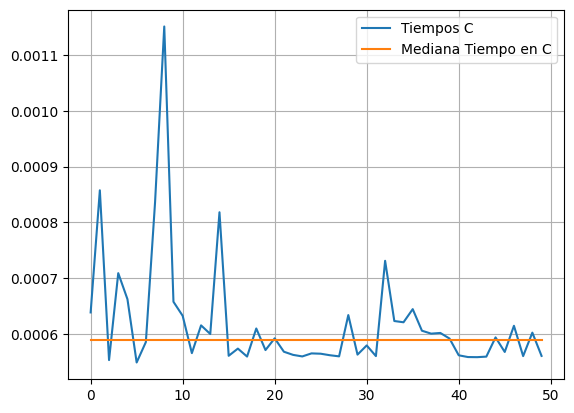

In [193]:

plt.plot(range(iteraciones), lista_py_time)
plt.plot(range(iteraciones),lista_medianas_py_ploteo)
plt.grid()
plt.legend(["Tiempos C","Mediana Tiempo en C"])
print("Mediana de los tiempos en C")
print(statistics.median(lista_py_time))

n) (0.5 ptos) Presente una gráfica para las mediciones de tiempo de la función en *C*. Incluya la mediana de los tiempos en el gráfico.

Mediana de los tiempos en C
1.6847500774019863e-05


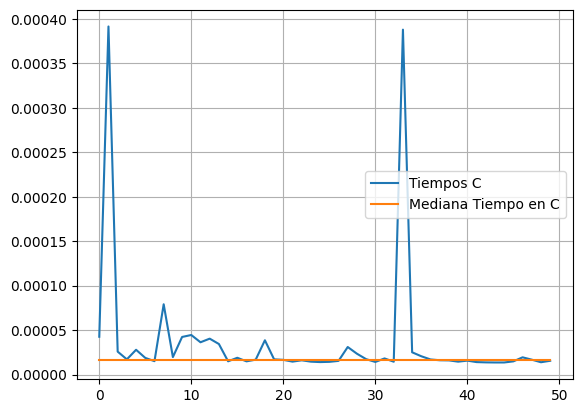

In [194]:

plt.plot(range(iteraciones), lista_c_time)
plt.plot(range(iteraciones),lista_medianas_c_ploteo)
plt.grid()
plt.legend(["Tiempos C","Mediana Tiempo en C"])
print("Mediana de los tiempos en C")
print(statistics.median(lista_c_time))

o) (0.5 pto) Realizar 50 mediciones de tiempo para las funciones implementadas en *C* y *Python* para el mayor de los tamaños.

In [195]:
import time
import numpy as np
import statistics
import matplotlib.pyplot as plt

tamaño_arreglo = array_potencia2[9]

iteraciones = 50

array_1024_c = crear_arreglo(tamaño_arreglo)
array_1024_py = crear_arreglo(tamaño_arreglo)

lista_c_time = []
lista_py_time = []

for i in range(iteraciones):
    
    tic1_c = time.perf_counter()
    c_normalizar_vector(array_1024_c)
    toc1_c = time.perf_counter()
    tiempo_c = toc1_c - tic1_c
    lista_c_time.append(tiempo_c)
    
    tic1_py = time.perf_counter()
    valor_array_py = py_normalizar_arreglo(array_1024_py)
    toc1_py = time.perf_counter()
    tiempo_py = toc1_py - tic1_py
    lista_py_time.append(tiempo_py)

media_normalizar_c = statistics.median(lista_c_time)
media_normalizar_py = statistics.median(lista_py_time)

lista_medianas_c_ploteo = []
lista_medianas_py_ploteo = []

for i in range(iteraciones):
    termino = media_normalizar_c
    lista_medianas_c_ploteo.append(termino)

for i in range(iteraciones):
    termino2 = media_normalizar_py
    lista_medianas_py_ploteo.append(termino2)

p) (0.5 ptos) Presente una gráfica para las mediciones de tiempo de la función en *Python*. Incluya la mediana de los tiempos en el gráfico.

Mediana de los tiempos en C
0.28467050650033343


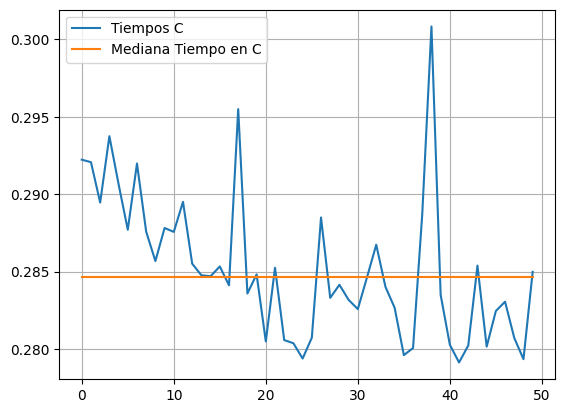

In [196]:

plt.plot(range(iteraciones), lista_py_time)
plt.plot(range(iteraciones),lista_medianas_py_ploteo)
plt.grid()
plt.legend(["Tiempos C","Mediana Tiempo en C"])
print("Mediana de los tiempos en C")
print(statistics.median(lista_py_time))

q) (0.5 ptos) Presente una gráfica para las mediciones de tiempo de la función en *C*. Incluya la mediana de los tiempos en el gráfico.

Mediana de los tiempos en C
0.004243671999574872


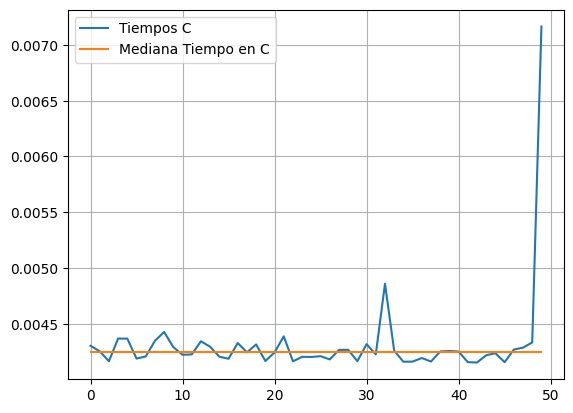

In [197]:

plt.plot(range(iteraciones), lista_c_time)
plt.plot(range(iteraciones),lista_medianas_c_ploteo)
plt.grid()
plt.legend(["Tiempos C","Mediana Tiempo en C"])
print("Mediana de los tiempos en C")
print(statistics.median(lista_c_time))

r) (0.5 ptos) Realizar 50 mediciones de tiempo y error relativo para las funciones implementadas en *C* y *Python* para todos los tamaños. El elemento representativo de cada tamaño será la mediana de las 50 mediciones.

In [205]:
import numpy as np
import matplotlib.pyplot as plt
import time
import statistics

lista_mediana_c = []
lista_mediana_py = []
lista_mediana_error_relativo = []

for i in range(0,9):

    tamaño_arreglo = array_potencia2[i]
    iteraciones = 50
    array_1024_c = crear_arreglo(tamaño_arreglo)
    array_1024_py = crear_arreglo(tamaño_arreglo)
    lista_c_time = []
    lista_py_time = []
    lista_errores_relativos = []

    for i in range(iteraciones):
        
        tic1_c = time.perf_counter()
        c_normalizar_vector(array_1024_c)
        toc1_c = time.perf_counter()
        tiempo_c = toc1_c - tic1_c
        lista_c_time.append(tiempo_c)
        
        tic1_py = time.perf_counter()
        valor_array_py = py_normalizar_arreglo(array_1024_py)
        toc1_py = time.perf_counter()
        tiempo_py = toc1_py - tic1_py
        lista_py_time.append(tiempo_py)

        valor_error_relativo = error_relativo( array_1024_c, valor_array_py)
        lista_errores_relativos.append(valor_error_relativo)


    media_normalizar_c = statistics.median(lista_c_time)
    media_normalizar_py = statistics.median(lista_py_time)
    media_error_relativo = statistics.median(lista_errores_relativos)

    lista_mediana_c.append(media_normalizar_c)
    lista_mediana_py.append(media_normalizar_py)
    lista_mediana_error_relativo.append(media_error_relativo)



s) (0.5 ptos) Presentar una gráfica de tiempo de ejecución por tamaño a partir de sus mediciones del ítem anterior.

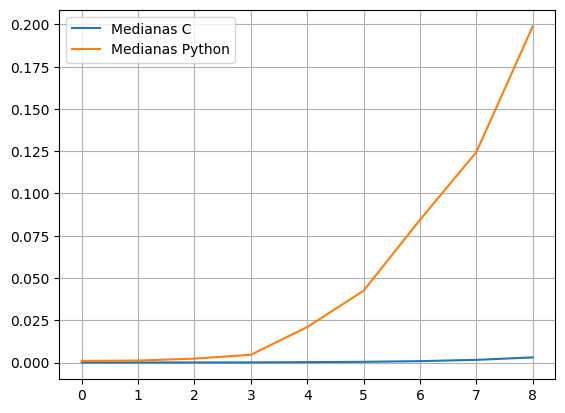

In [202]:
plt.plot(lista_mediana_c)
plt.plot(lista_mediana_py)

plt.grid()
plt.legend(["Medianas C","Medianas Python"])

t) (0.5 ptos) Presentar una gráfica de speedup por tamaño a partir de sus mediciones.

In [207]:
import numpy as np
import matplotlib.pyplot as plt
import time
import statistics

lista_mediana_c = []
lista_mediana_py = []
lista_mediana_error_relativo = []
lista_speedup = []

for i in range(0,9):

    tamaño_arreglo = array_potencia2[i]
    iteraciones = 50
    array_1024_c = crear_arreglo(tamaño_arreglo)
    array_1024_py = crear_arreglo(tamaño_arreglo)
    lista_c_time = []
    lista_py_time = []
    lista_errores_relativos = []

    for i in range(iteraciones):
        
        tic1_c = time.perf_counter()
        c_normalizar_vector(array_1024_c)
        toc1_c = time.perf_counter()
        tiempo_c = toc1_c - tic1_c
        lista_c_time.append(tiempo_c)
        
        tic1_py = time.perf_counter()
        valor_array_py = py_normalizar_arreglo(array_1024_py)
        toc1_py = time.perf_counter()
        tiempo_py = toc1_py - tic1_py
        lista_py_time.append(tiempo_py)

        valor_error_relativo = error_relativo( array_1024_c, valor_array_py)
        lista_errores_relativos.append(valor_error_relativo)


    media_normalizar_c = statistics.median(lista_c_time)
    media_normalizar_py = statistics.median(lista_py_time)
    media_error_relativo = statistics.median(lista_errores_relativos)

    lista_mediana_c.append(media_normalizar_c)
    lista_mediana_py.append(media_normalizar_py)
    lista_mediana_error_relativo.append(media_error_relativo)

    speedup = lista_mediana_py[i]/lista_c_time[i]
    lista_speedup.append(speedup)

plt.plot(lista_speedup)
plt.plot(lista_speedup)
plt.grid()
plt.legend(["SpeedUp C/py"])

IndexError: list index out of range

u) (0.5 ptos) Presentar una gráfica de error relativo por tamaño a partir de sus mediciones

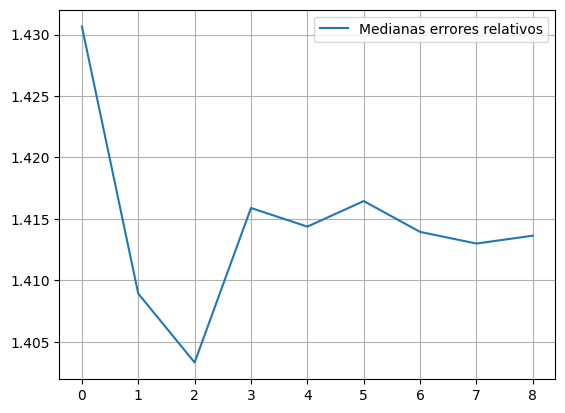

In [206]:
plt.plot(lista_mediana_error_relativo)
plt.grid()
plt.legend(["Medianas errores relativos"])